# Assignment 1, PHYS 2600
Erin Morissette \
Troubleshooting partner: Calvin Bales \
February 11, 2021

In [4]:
# Standard preamble 
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 
import matplotlib

# Make plots larger 
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16

## Problem 1 
Write a Python function to calculate CV for a given material and temperature.Your program should take the density, sample volume, Debye Temperature, tem-perature upper limit, and required accuracy as inputs, and output the heat capac-ity between T = 0 and the upper temperature limit. Use an adaptive Simpson’srule to evaluate the integral to the required accuracy.

In [45]:
# Boltzmann constant
kB = 1.38e-23

# Define integrand function 
def integrand(x, power1, power2):
    f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
    return f

# Standard function for any polynomial 
def polynomial(x,*args):
    f = 0*x
    for (i,a) in enumerate(args):
        f += a*x**(i)
    return f

# Adaptive Simpson integrator 
def adap_Simpson(f, start, stop, N, error, args = None):
    
    width = stop - start
    h = width/N
    x = np.arange(start, stop+h, h)
    
    # first pass  
    S =  (2*f(x[2:-2:2],*args).sum() + f(start,*args) + f(stop,*args)) * 1/3
    
    # an arbitrary starting value for error 
    eps = 10
    T = 0
    
    # while error is greater than required accuracy, repeat with double the points 
    while eps >= error:
        Fm = h*(S + 2*T)
        S = S + T
        N = 2*N
        h = width/N
        x = np.arange(start, stop+h, h)
        T = f(x[1:-2:2],*args).sum()*(2/3)
        F = h*(S + 2*T)
        eps = (F - Fm)*(1/15)
        
    return F

In [46]:
# Test of adaptive Simpson 
integral = adap_Simpson(polynomial, 0, 10, 100, .001, args = (0,5))
print(integral)

249.9918640136719


Text(0, 0.5, 'Integrand value')

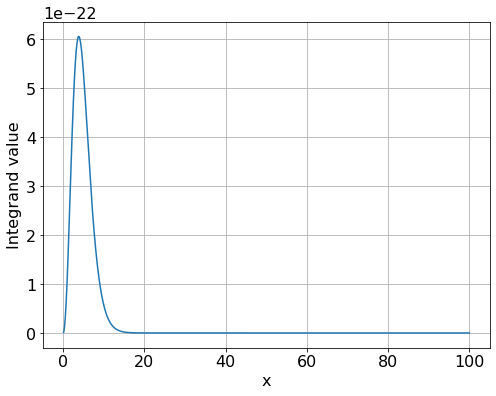

In [48]:
# Plot of integrand - upper limit of integral should be >= 20
x = np.linspace(0.1,100,1000)
plt.plot(x, 9* kB* integrand(x,4,2))
plt.grid()
plt.xlabel('x')
plt.ylabel('Integrand value')

1000 mm3, samples of Lead θD= 105 K,Aluminum θD= 428 K, and Diamond θD= 2230 K

In [ ]:
# Function for calculating heat capacity 
def Cv(density, volume, temp, tempD, error):
    
    integral = adap_Simpson(integrand, 0.0001, tempD/temp, 1000, error, args = (4,2))
    spec_Cv = 9.0 * kB * (temp/tempD)**3 * integral
    mass = density*volume 
    Cv = mass*spec_Cv
    
    return Cv
    
# Temperature and Debye temperatures for each material
temperature = np.linspace(1,3000,200)
td1 = 105
td2 = 428
td3 = 2230


lead = []
aluminum = []
diamond = []
for i in temperature:
    lead.append( Cv(11340, 1e-6, i, 105, .001))
    aluminum.append(Cv(2700, 1e-6, i, 428, .001))
    diamond.append(Cv(3520, 1e-6, i, 2230, .001))

Text(0, 0.5, 'Heat Capacity (J/K)')

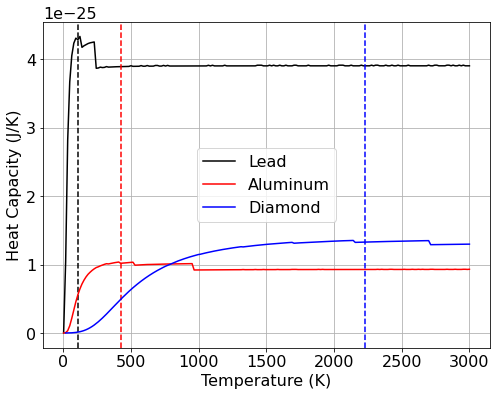

In [51]:
plt.plot(temperature,lead, label = "Lead", color = 'k')
plt.axvline(x= td1, linestyle = '--', color = 'k')
plt.plot(temperature, aluminum, label = 'Aluminum', color = 'r' )
plt.axvline(x= td2, linestyle = '--', color = 'r')
plt.plot(temperature, diamond, label = 'Diamond', color = 'b')
plt.axvline(x= td3, linestyle = '--', color = 'b')

plt.grid()
plt.legend(loc = 'center')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')


## Problem 2
Find  the  1$^{\text{st}}$ order  ordinary  differential  equation  governing V$_{\text{out}}$(t).

$$ \frac{\text{ d} V_{\text{out}}}{\text{dt}} =  \frac{1}{RC}  (V_{\text{in}} - V_{\text{out}}) $$

In [18]:
# RK4 integrator 

def rk4(dt, t_final, R, C, V0, V_in, t0=0.0):
    
    #initialize some empty lists
    V_list = []
    t_list = []
    
    # number of time steps
    n  = int(t_final/dt) 
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # set initial conditions
            V = V0
            t = t0
        else :
            # rk4 method 
            k1 = dt * ((V_in(t) - V)/(R*C))
            k2 = dt * ((V_in(t + dt/2) - (V+ k1/2))/(R*C))
            k3 = dt * ((V_in(t + dt/2) - (V+ k2/2))/(R*C))
            k4 = dt * ((V_in(t + dt/2) - (V+ k3/2))/(R*C))

            # update value at each time step and step time by dt
            V += (k1 + 2*k2 + 2*k3 + k4)/6
            t += dt

        # append to add on to the list
        V_list.append(V)
        t_list.append(t)
    
    # turn the lists into numpy arrays 
    V_list = np.array(V_list, dtype = "object")
    t_list = np.array(t_list, dtype = "object")
    
    return t_list, V_list

In [19]:
# Square wave function for input 
def square_wave(t):
    return np.sign( np.sin(2* np.pi * t))

Text(0, 0.5, 'V$_{out}$')

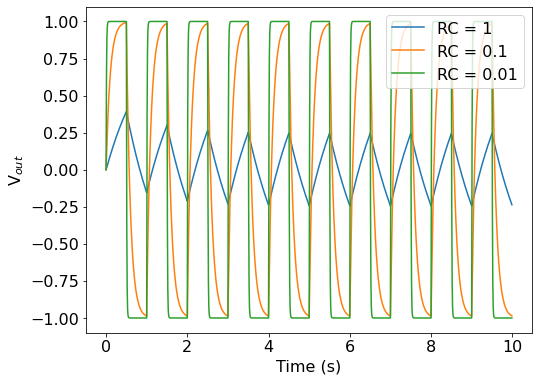

In [27]:
t_list, V_1 = rk4(0.01, 10, 1, 1, 0, square_wave, 0)
plt.plot(t_list, V_1, label = 'RC = 1')
t_list, V_0p1 = rk4(0.01, 10, .1, 1, 0, square_wave, 0)
plt.plot(t_list, V_0p1, label = 'RC = 0.1')
t_list, V_0p01 = rk4(0.01, 10, .01, 1, 0, square_wave, 0)
plt.plot(t_list, V_0p01, label = 'RC = 0.01')


plt.legend()
plt.xlabel('Time (s)')
plt.ylabel(r'V$_{out}$')

Physically, this circuit is essentially a low pass filter which receives signal of a certain frequency and returns signals that are lower than a specified cutoff frequency (1/RC) while attenuating those which exceed the cutoff frequency. This effect is evident in the plot above, where the cutoff frequencies are 1, 10, and 100 respectively. 

## Problem 3

Consider radioative decay involving two distinct types of nuclei, A and B, with populations $N_A(t)$ and $N_B(t)$ decay according to the following differential equations:
\
$$ \frac{dN_A}{dt} = - \frac{N_A}{\tau_A}, \\ 
\frac{dN_B}{dt} = \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B} $$

The analytical solutions are as follows:
\
$$ N_A(t) = N_A^0 e^{-t/\tau_A} \\
N_B(t) = \left (N_B^0 - \frac{N_A^0 \tau_B}{\tau_A - \tau_B} \right ) e^{-t/\tau_B} + \frac{N_A^0 \tau_B}{\tau_A - \tau_B} e^{-t/\tau_A} $$
where the solution for $ N_B $ is the sum of the homogenous and particular solution of its non-homogeneous differential equation. 

In [32]:
def rk4(dt, t_final, NA0, NB0, tA, tB, t0=0.0):
    
    #initialize some empty lists 
    NA_list = []
    NB_list = []
    t_list = []
    
    # number of time steps
    n  = int(t_final/dt) 
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # initial conditions 
            NA = NA0
            NB = NB0
            t = t0
        else :
            # RK4 method 
            k1a = - dt * (NA/tA)
            k2a = - dt * ((NA + k1a/2)/tA)
            k3a = - dt * ((NA + k2a/2)/tA)
            k4a = - dt * ((NA + k3a/2)/tA)
            
            k1b = dt * ((NA/tA) - (NB/tB))
            k2b = dt * ((NA/tA) - ((NB + k1b/2)/tB))
            k3b = dt * ((NA/tA) - ((NB + k2b/2)/tB))
            k4b = dt * ((NA/tA) - ((NB + k3b/2)/tB))

            # update value at each time step and step time by dt
            NA += (k1a + 2*k2a + 2*k3a + k4a)/6
            NB += (k1b + 2*k2b + 2*k3b + k4b)/6
            t += dt
            
        NA_list.append(NA)
        NB_list.append(NB)
        t_list.append(t)
    
    NA_list = np.array(NA_list, dtype = "object")
    NB_list = np.array(NB_list, dtype = "object")
    t_list = np.array(t_list, dtype = "object")
    
    return t_list, NA_list, NB_list

In [33]:
# Trying out the rk4 integrator for some initial values 

NA0 = 100
NB0 = 0

tA = 4
tB = 2
 
t_list, NA_list, NB_list = rk4(.01, 40, NA0, NB0, tA, tB, t0=0.0)

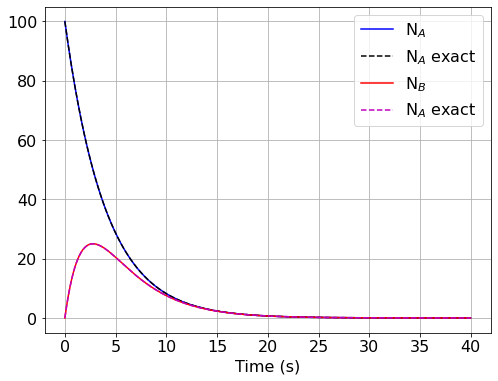

In [34]:
# Comparing the rk4 result to the analytical solution 
time = np.linspace(0,40,1000)

plt.plot(t_list, NA_list, label = 'N$_A$', color = 'b')
plt.plot(time, NA0*np.exp(-time/tA), label = 'N$_A$ exact', linestyle = '--', color = 'k')
plt.plot(t_list, NB_list, label = 'N$_B$', color = 'r')
plt.plot(time, (NB0 -(NA0*tB)/(tA - tB))*np.exp(-time/tB) + ((NA0*tB)/(tA - tB))*np.exp(-time/tA), label = 'N$_A$ exact', linestyle = '--', color = 'm')

plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.show()

The plot above shows excellent agreement with the analytic solution. 

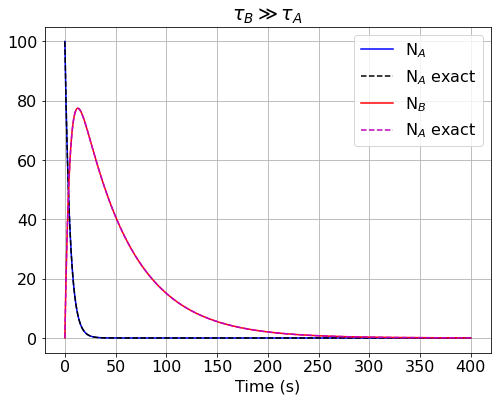

In [61]:
# Different values of tA and tB, tB >> tA 
NA0 = 100
NB0 = 0

tA = 5
tB = 50
 
t_list, NA_list, NB_list = rk4(.01, 400, NA0, NB0, tA, tB, t0=0.0)

time = np.linspace(0,400,1000)

plt.plot(t_list, NA_list, label = 'N$_A$', color = 'b')
plt.plot(time, NA0*np.exp(-time/tA), label = 'N$_A$ exact', linestyle = '--', color = 'k')
plt.plot(t_list, NB_list, label = 'N$_B$', color = 'r')
plt.plot(time, (NB0 -(NA0*tB)/(tA - tB))*np.exp(-time/tB) + ((NA0*tB)/(tA - tB))*np.exp(-time/tA), label = 'N$_A$ exact', linestyle = '--', color = 'm')

plt.legend()
plt.grid()
plt.title(r'$\tau_B \gg \tau_A$')
plt.xlabel('Time (s)')
plt.show()

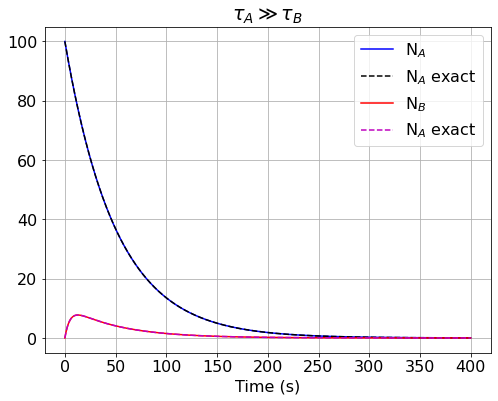

In [62]:
# Different values of tA and tB, tA >> tB 
NA0 = 100
NB0 = 0

tA = 50
tB = 5
 
t_list, NA_list, NB_list = rk4(.01, 400, NA0, NB0, tA, tB, t0=0.0)

time = np.linspace(0,400,1000)

plt.plot(t_list, NA_list, label = 'N$_A$', color = 'b')
plt.plot(time, NA0*np.exp(-time/tA), label = 'N$_A$ exact', linestyle = '--', color = 'k')
plt.plot(t_list, NB_list, label = 'N$_B$', color = 'r')
plt.plot(time, (NB0 -(NA0*tB)/(tA - tB))*np.exp(-time/tB) + ((NA0*tB)/(tA - tB))*np.exp(-time/tA), label = 'N$_A$ exact', linestyle = '--', color = 'm')

plt.legend()
plt.grid()
plt.title(r'$\tau_A \gg \tau_B$')
plt.xlabel('Time (s)')
plt.show()

Important ratios for $\tau_B/\tau_A$ are for example $\tau_B/\tau_A$ = 1, in which the solution for $N_B$ diverges. 

## Problem 4

Consider a baseball hit near ground level at a takeoff angle of θ above the horizontal, with an initial speed of $v_0$. 
Assume there is air resistance that gives a drag force of the form

$$ F_D = - \frac{1}{2} C_d A \vec{v} \cdot \vec{v} \hat{v} $$

For a baseball $C_d$ is approximately 0.3, and independent of velocity. The mass of a baseball is 0.15 kg, and the diameter is 7.4 cm.

The equation of motion for the baseball can be found using Newton's second law:

$$ \vec{F} = m \vec{a} =  \vec{F}_g + \vec{F}_d 
\\
\frac{d \vec{v}}{dt} = -g \hat{y} - \frac{C_d A}{2m} v^2 \hat{v} $$

Separating this vector equation into its x and y components,

$$ \frac{dv_x}{dt} = - \frac{C_d A}{2m} v^2 \cos (\tan^{-1} \frac{v_y}{v_x})
\\
\frac{dv_y}{dt} = -g - \frac{C_d A}{2m} v^2 \sin (\tan^{-1} \frac{v_y}{v_x})
$$

In [5]:
# Define constants 
g, Cd, m, A = 9.81, 0.3, 0.15, np.pi*((.074/2)**2)
drag = (Cd*A)/(2*m)

# Functions for differential equations 
def gx(vx, vy):
    theta = np.arctan(vy/vx)
    return -drag * (vx**2 + vy**2) * np.cos(theta)

def gy(vx, vy):
    theta = np.arctan(vy/vx)
    return -g - drag * (vx**2 + vy**2) * np.sin(theta)

In [6]:
def rk4(dt, t_final, v0, theta0, t0=0.0):
    
    #initialize some empty lists to store our data and time steps
    vx_list = []
    vy_list = []
    t_list = []
    x_list = []
    y_list = []
    
    # number of time steps, nust be an integer
    n  = int(t_final/dt) 
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # initial conditions 
            vx = v0 * np.cos(theta0*(np.pi/180))
            vy = v0 * np.sin(theta0*(np.pi/180))
            t = t0
            x = 0
            y = 0
        else :
            # RK4 method 
            
            k1x = dt * gx(vx, vy)
            k2x = dt * gx(vx+k1x/2, vy)
            k3x = dt * gx(vx+k2x/2, vy)
            k4x = dt * gx(vx+k3x/2, vy)
            
            k1y = dt * gy(vx, vy)
            k2y = dt * gy(vx, vy+k1y/2)
            k3y = dt * gy(vx, vy+k2y/2)
            k4y = dt * gy(vx, vy+k3y/2)

            # update value of Q at each time step and step time by dt
            vx += (k1x + 2*k2x + 2*k3x + k4x)/6
            vy += (k1y + 2*k2y + 2*k3y + k4y)/6
            x += vx*dt
            y += vy*dt
            t += dt
            
            if y <= 0:
                
                vx = 0.6 * np.sqrt(vx**2 + vy**2) * np.cos(np.arctan(-vy/vx))
                vy = 0.6 * np.sqrt(vx**2 + vy**2) * np.sin(np.arctan(-vy/vx))
                
                
                k1x = dt * gx(vx, vy)
                k2x = dt * gx(vx+k1x/2, vy)
                k3x = dt * gx(vx+k2x/2, vy)
                k4x = dt * gx(vx+k3x/2, vy)
                
                k1y = dt * gy(vx, vy)
                k2y = dt * gy(vx, vy+k1y/2)
                k3y = dt * gy(vx, vy+k2y/2)
                k4y = dt * gy(vx, vy+k3y/2)
    
                # update value of Q at each time step and step time by dt
                vx += (k1x + 2*k2x + 2*k3x + k4x)/6
                vy += (k1y + 2*k2y + 2*k3y + k4y)/6
                x += vx*dt
                y += vy*dt
                t += dt
                
            
            
        # use append to add on to the end of a list
        vx_list.append(vx)
        vy_list.append(vy)
        x_list.append(x)
        y_list.append(y)
        t_list.append(t)

    
    # we turn the lists into numpy arrays before returning
    
    vx_list = np.array(vx_list, dtype = "object")
    vy_list = np.array(vy_list, dtype = "object")
    x_list = np.array(x_list, dtype = "object")
    y_list = np.array(y_list, dtype = "object")
    t_list = np.array(t_list, dtype = "object")
    
    return t_list, vx_list, vy_list, x_list, y_list


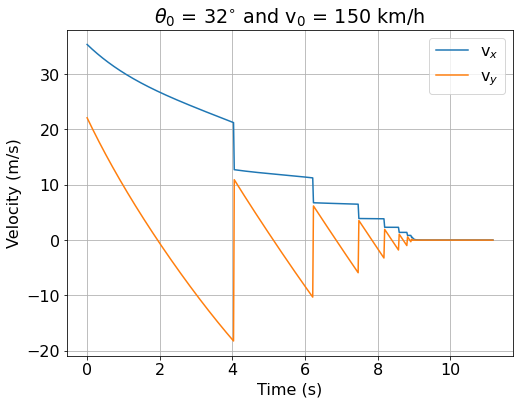

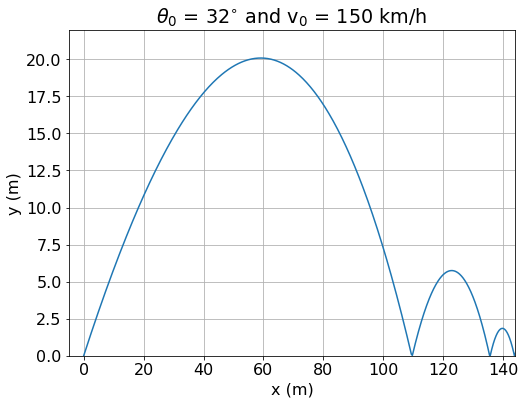

In [14]:
# Plot x−t, y−t, and y−x curves for the baseball with θ = 32◦ and v0 = 150 km/h

t_list, vx_list, vy_list, x_list, y_list = rk4(.01, 10, 41.67, 32, t0 = 0.0)


plt.plot(t_list, vx_list, label = 'v$_x$')
plt.plot(t_list, vy_list, label = 'v$_y$')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title(r'$\theta_0$ = 32$^{\circ}$ and v$_0$ = 150 km/h')
plt.grid()
plt.show()

plt.plot(x_list, y_list)
plt.ylim(0,22)
plt.xlim(-5, 144)
plt.grid()
plt.title(r'$\theta_0$ = 32$^{\circ}$ and v$_0$ = 150 km/h')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()




In [15]:
# Loop through every initial angle in integer steps and find x distance 
# Ten seconds is a sufficient end time for the ball to stop moving, see velocity plots above 
distance = []
for i in range(90):
    t_list, vx_list, vy_list, x_list, y_list = rk4(.01, 10, 41.67, i, t0 = 0.0)
    distance.append(x_list[-1])
    

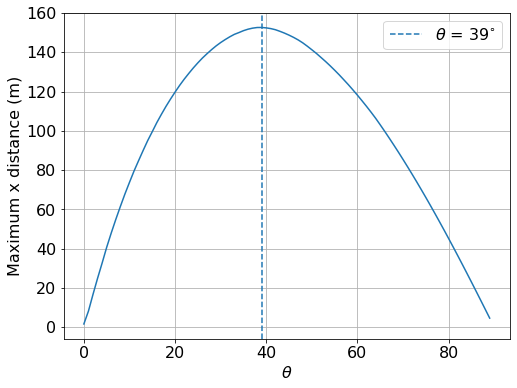

In [22]:
# Plot x distance as a function of initial angle 
plt.plot(range(90), distance)
plt.axvline(x = distance.index(max(distance)), linestyle = '--', label = r'$\theta$ = ' + str(distance.index(max(distance))) + '$^{\circ}$')
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('Maximum x distance (m)')
plt.legend(loc = 'upper right')

In [26]:
# Function for work integrand, Fd dr 
def work_int(vx, vy, x, y):
    theta1 = np.arctan(vy/vx)
    theta2 = np.arctan(y/x)
    return -drag * m * (vx**2 + vy**2) * np.sqrt(x**2 + y**2) #* np.cos(theta1+theta2)


In [27]:
# New rk4 to include calculating work and energy at each step 
def rk4_work(dt, t_final, v0, theta0, t0=0.0):
    
    #initialize some empty lists 
    vx_list = []
    vy_list = []
    t_list = []
    x_list = []
    y_list = []
    w_list = []
    E_list = []
    w = 0
    E = 0
    # number of time steps
    n  = int(t_final/dt) 
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # initial conditions 
            vx = v0 * np.cos(theta0*(np.pi/180))
            vy = v0 * np.sin(theta0*(np.pi/180))
            t = t0
            x = 0
            y = 0
            
            E = 0.5*m*(vx**2 + vy**2) 
        else :
            # RK4 method 
            k1x = dt * gx(vx, vy)
            k2x = dt * gx(vx+k1x/2, vy)
            k3x = dt * gx(vx+k2x/2, vy)
            k4x = dt * gx(vx+k3x/2, vy)
            
            k1y = dt * gy(vx, vy)
            k2y = dt * gy(vx, vy+k1y/2)
            k3y = dt * gy(vx, vy+k2y/2)
            k4y = dt * gy(vx, vy+k3y/2)

            # update value at each time step and step time by dt
            vx += (k1x + 2*k2x + 2*k3x + k4x)/6
            vy += (k1y + 2*k2y + 2*k3y + k4y)/6
            x += vx*dt
            y += vy*dt
            w += work_int(vx,vy,vx*dt, vy*dt)
            E = 0.5*m*(vx**2 + vy**2) + m*g*y
            t += dt
            
            # Break after first bounce 
            if y <= 0:
                print(t)
                break
                   
        vx_list.append(vx)
        vy_list.append(vy)
        x_list.append(x)
        y_list.append(y)
        w_list.append(w)
        E_list.append(E)
        t_list.append(t)
    
    vx_list = np.array(vx_list, dtype = "object")
    vy_list = np.array(vy_list, dtype = "object")
    x_list = np.array(x_list, dtype = "object")
    y_list = np.array(y_list, dtype = "object")
    w_list = np.array(w_list, dtype = "object")
    t_list = np.array(t_list, dtype = "object")
    
    return t_list, vx_list, vy_list, x_list, y_list, w_list, E_list 

In [28]:
t_list, vx_list, vy_list, x_list, y_list, w_list, E_list  = rk4_work(.0001, 3.8, 30, 42, t0 = 0.0)
# plt.plot(x_list, y_list)


In [29]:
print(E_list[-1] - E_list[0])
print(w_list[-1])

-25.6025816317973
-25.599257262070925


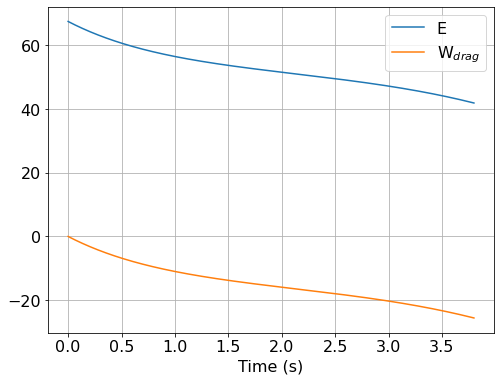

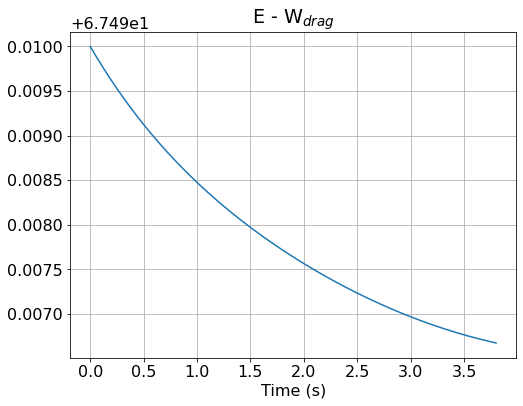

In [31]:
plt.plot(t_list, E_list, label = 'E')
plt.plot(t_list, w_list, label = 'W$_{drag}$')
plt.xlabel('Time (s)')
plt.grid()
plt.legend()
plt.show()

plt.plot(t_list, E_list - w_list)
plt.title('E - W$_{drag}$')
plt.xlabel('Time (s)')
plt.grid()
plt.show()

## Problem 5 
A crude model for a muon detection system at the LHC is an empty drift space measuring 4.7 m in length that is surrounded by a toroidal magnetic field. The field is approximated to be that of an ideal toroid with an inner radius of 4.25 m and an outer radius of 11 m. The magnetic field at the inner radius is 4.7 T. Consider a charged particle (muon) that enters the magnetic system in the plane perpendicular to the axis of the toroid.
Numerically determine the amount by which the particle bends when the particle’s momentum is 50 GeV/c; 100 GeV/c; 500 GeV/c; and 1000 GeV/c.

In [63]:
# Magnetic field strength (T) as a function of radius (m)
q = -1
m0 = 105.7 # MeV/c^2 

def Bmag(r):
    return (4.25 * 4.7)/r

def gamma(vx, vy):
    return 1/np.sqrt(1 - (vx**2 + vy**2))

def degrad(deg):
    return deg * (np.pi)/180

def px(x, y, vx, vy):
    return (q * vy * Bmag(x))/ m0

def py(x, y, vx, vy):
    return (- q * vx * Bmag(x))/m0

In [73]:
def rk4(dt, t_final, v0, t0=0.0):
    
    #initialize some empty lists to store our data and time steps
    vx_list = []
    vy_list = []
    t_list = []
    x_list = []
    y_list = []
    
    # number of time steps, nust be an integer
    n  = int(t_final/dt) 
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # initial conditions 
            vx = v0
            vy = 0
            t = t0
            x = 4.25 
            y = 0
        
        else :
            # RK4 method 
            
            k1x = dt * px(x,y,vx, vy)
            k2x = dt * px(x,y,vx+k1x/2, vy)
            k3x = dt * px(x,y,vx+k2x/2, vy)
            k4x = dt * px(x,y,vx+k3x/2, vy)
        
            k1y = dt * py(x, y, vx, vy)
            k2y = dt * py(x, y, vx, vy+k1y/2)
            k3y = dt * py(x, y, vx, vy+k2y/2)
            k4y = dt * py(x, y, vx, vy+k3y/2)

            # update value of Q at each time step and step time by dt
            vx += (k1x + 2*k2x + 2*k3x + k4x)/6
            vy += (k1y + 2*k2y + 2*k3y + k4y)/6
            x += (vx*dt)/m0
            y += (vy*dt)/m0
            t += dt
            
            if x> 11.0:
                x += (vx*dt)/m0
                y += (vy*dt)/m0
                t += dt
            
            if x> 15.7:
                break
            
            # use append to add on to the end of a list
        vx_list.append(vx)
        vy_list.append(vy)
        x_list.append(x)
        y_list.append(y)
        t_list.append(t)

    
    # we turn the lists into numpy arrays before returning
    
    vx_list = np.array(vx_list, dtype = "object")
    vy_list = np.array(vy_list, dtype = "object")
    x_list = np.array(x_list, dtype = "object")
    y_list = 1.0e3*np.array(y_list, dtype = "object")
    t_list = np.array(t_list, dtype = "object")
    
    return t_list, vx_list, vy_list, x_list, y_list

            

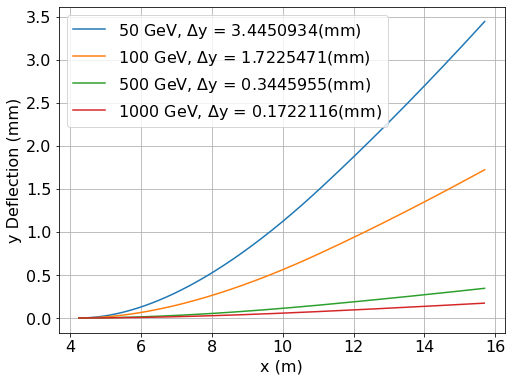

In [77]:
# Testing necessary dt for accuracy < 0.8 um, compared wit dt = 1e-7 in next plot 
end = 0.1
dt = 1e-6

t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 50e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '50 GeV, $\Delta$y = ' + str(round(y_list[-1], 7)) + ' (mm)' )
t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 100e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '100 GeV, $\Delta$y = ' + str(round(y_list[-1], 7))+ ' (mm)')
t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 500e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '500 GeV, $\Delta$y = ' + str(round(y_list[-1], 7))+ ' (mm)')
t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 1000e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '1000 GeV, $\Delta$y = ' + str(round(y_list[-1], 7))+ ' (mm)')


plt.legend()
# plt.xlim(4.25, 15.7)
# plt.ylim(-0.005, 0)
plt.xlabel('x (m)')
plt.ylabel('y Deflection (mm)')
plt.grid()
plt.show()

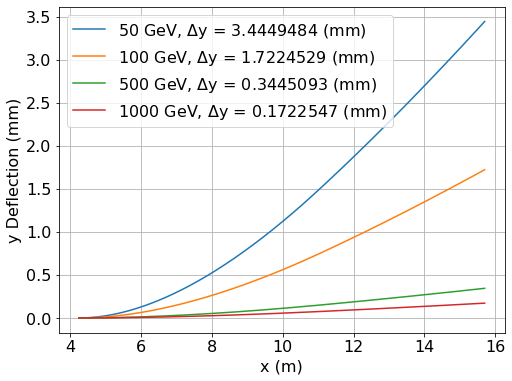

In [79]:
end = 0.1
dt = 1e-7

t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 50e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '50 GeV, $\Delta$y = ' + str(round(y_list[-1], 7)) + ' (mm)')
t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 100e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '100 GeV, $\Delta$y = ' + str(round(y_list[-1], 7)) +' (mm)')
t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 500e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '500 GeV, $\Delta$y = ' + str(round(y_list[-1], 7)) +' (mm)')
t_list, vx_list, vy_list, x_list, y_list = rk4(dt, end, 1000e3, t0 = 0.0)
plt.plot(x_list, y_list, label = '1000 GeV, $\Delta$y = ' + str(round(y_list[-1], 7)) + ' (mm)')


plt.legend()
# plt.xlim(4.25, 15.7)
# plt.ylim(-0.005, 0)
plt.xlabel('x (m)')
plt.ylabel('y Deflection (mm)')
plt.grid()
plt.show()

Since the difference in deflection values for each initial momentum is less than 0.8 microns, a step size of dt = 1e-6 from 0 to 0.1 s is sufficient for the rk4 integrator.
            